In [2]:
#ML Tlachac, Left on Read, 2022
#https://github.com/mltlachac/UbiComp2022

import pandas as pd
import matplotlib.pyplot as plt

C:\Users\mltla\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mltla\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\mltla\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


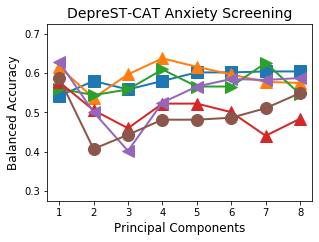

In [19]:
name = "latencyCAT"
label = "gad" #gad
split = 10
low = 7
resultsDF = pd.read_csv("results2/" + name + label + str(split) + "low" + str(low) + ".csv")

modellist = sorted(list(set(resultsDF.model)))
featurelist = sorted(list(set(resultsDF.nFeatures)))
balancedAcc = []

for model in modellist:
    values = []
    for features in featurelist:
        tempdf = resultsDF[(resultsDF.model == model) & (resultsDF.nFeatures == features)]
        
        sen = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falseNeg))
        spec = sum(tempdf.trueNeg)/(sum(tempdf.trueNeg) + sum(tempdf.falsePos))
        ba = (sen+spec)/2
        
        values.append(ba)
    balancedAcc.append(values)
    
modellist = ["LR", "NB", "RF", "SVC", "XGBoost", "kNN"]

markers = ['s', '^', '>', '^', '<', 'o']
plt.figure(figsize = (4.75, 3.25))
for i in range(0, len(balancedAcc)):
    plt.plot(featurelist, balancedAcc[i], marker = markers[i], label = modellist[i], linewidth=2, markersize=12)
    
plt.ylim(0.275, 0.725)
plt.xlabel("Principal Components", fontsize = 12)
plt.ylabel("Balanced Accuracy", fontsize = 12)
plt.title("DepreST-CAT Anxiety Screening", fontsize = 14)
#plt.legend(ncol=3,loc=3)

plt.savefig("anxietyCAT2.png", bbox_inches = "tight")

plt.show()
plt.close()

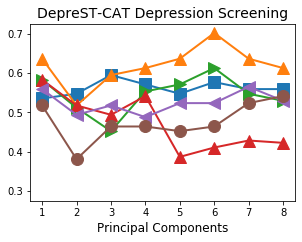

In [18]:
name = "latencyCAT"
label = "phq" #gad
split = 10
low = 7
resultsDF = pd.read_csv("results2/" + name + label + str(split) + "low" + str(low) + ".csv")

modellist = sorted(list(set(resultsDF.model)))
featurelist = sorted(list(set(resultsDF.nFeatures)))
balancedAcc = []

for model in modellist:
    values = []
    for features in featurelist:
        tempdf = resultsDF[(resultsDF.model == model) & (resultsDF.nFeatures == features)]
        
        sen = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falseNeg))
        spec = sum(tempdf.trueNeg)/(sum(tempdf.trueNeg) + sum(tempdf.falsePos))
        ba = (sen+spec)/2
        
        values.append(ba)
    balancedAcc.append(values)
    
modellist = ["LR", "NB", "RF", "SVC", "XG", "kNN"]

markers = ['s', '^', '>', '^', '<', 'o']
plt.figure(figsize = (4.75, 3.25))
for i in range(0, len(balancedAcc)):
    plt.plot(featurelist, balancedAcc[i], marker = markers[i], label = modellist[i], linewidth=2, markersize=12)
    
plt.ylim(0.275, 0.725)
plt.xlabel("Principal Components", fontsize = 12)
#plt.ylabel("Balanced Accuracy", fontsize = 12)
plt.title("DepreST-CAT Depression Screening", fontsize = 14)
#plt.legend(ncol=3,loc=3)

plt.savefig("depressionCAT2.png", bbox_inches = "tight")

plt.show()
plt.close()

In [55]:
name = "latencyCAT"
label = "gad" #gad
split = 10
low = 7
resultsDF = pd.read_csv("results2/" + name + label + str(split) + "low" + str(low) + ".csv")

prev = 0

for model in set(resultsDF.model):
    for features in set(resultsDF.nFeatures):
        tempdf = resultsDF[(resultsDF.model == model) & (resultsDF.nFeatures == features)]
        
        sen = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falseNeg))
        spec = sum(tempdf.trueNeg)/(sum(tempdf.trueNeg) + sum(tempdf.falsePos))
        prec = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falsePos))
        ba = (sen+spec)/2
        f1 = (2*prec*sen)/(prec + sen)
        acc = (sum(tempdf.truePos) + sum(tempdf.trueNeg))/tempdf.shape[0]
        if ba>=prev:
            prev = ba
            print(model)
            print(features)
            print("TP = " + str(sum(tempdf.truePos)))
            print("FP = " + str(sum(tempdf.falsePos)))
            print("FN = " + str(sum(tempdf.falseNeg)))
            print("TN = " + str(sum(tempdf.trueNeg)))
            print("Bal Acc = " + str(ba))
            print("F1 = " + str(f1))
            print("Acc = " + str(acc))
            print("Sens = " + str(sen))
            print("Spec = " + str(spec))

NB
1
TP = 23
FP = 15
FN = 3
TN = 8
Bal Acc = 0.6162207357859532
F1 = 0.71875
Acc = 0.6326530612244898
Sens = 0.8846153846153846
Spec = 0.34782608695652173
NB
4
TP = 23
FP = 14
FN = 3
TN = 9
Bal Acc = 0.6379598662207357
F1 = 0.7301587301587302
Acc = 0.6530612244897959
Sens = 0.8846153846153846
Spec = 0.391304347826087


In [56]:
name = "latencyCAT"
label = "phq" #gad
split = 10
low = 7
resultsDF = pd.read_csv("results2/" + name + label + str(split) + "low" + str(low) + ".csv")

prev = 0

for model in set(resultsDF.model):
    for features in set(resultsDF.nFeatures):
        tempdf = resultsDF[(resultsDF.model == model) & (resultsDF.nFeatures == features)]
        
        sen = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falseNeg))
        spec = sum(tempdf.trueNeg)/(sum(tempdf.trueNeg) + sum(tempdf.falsePos))
        prec = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falsePos))
        ba = (sen+spec)/2
        f1 = (2*prec*sen)/(prec + sen)
        acc = (sum(tempdf.truePos) + sum(tempdf.trueNeg))/tempdf.shape[0]
        if ba>=prev:
            prev = ba
            print(model)
            print(features)
            print("TP = " + str(sum(tempdf.truePos)))
            print("FP = " + str(sum(tempdf.falsePos)))
            print("FN = " + str(sum(tempdf.falseNeg)))
            print("TN = " + str(sum(tempdf.trueNeg)))
            print("Bal Acc = " + str(ba))
            print("F1 = " + str(f1))
            print("Acc = " + str(acc))
            print("Sens = " + str(sen))
            print("Spec = " + str(spec))

NB
1
TP = 25
FP = 13
FN = 3
TN = 8
Bal Acc = 0.6369047619047619
F1 = 0.7575757575757577
Acc = 0.673469387755102
Sens = 0.8928571428571429
Spec = 0.38095238095238093
NB
5
TP = 25
FP = 13
FN = 3
TN = 8
Bal Acc = 0.6369047619047619
F1 = 0.7575757575757577
Acc = 0.673469387755102
Sens = 0.8928571428571429
Spec = 0.38095238095238093
NB
6
TP = 26
FP = 11
FN = 2
TN = 10
Bal Acc = 0.7023809523809523
F1 = 0.7999999999999999
Acc = 0.7346938775510204
Sens = 0.9285714285714286
Spec = 0.47619047619047616


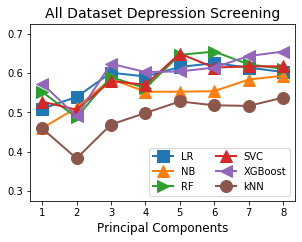

In [22]:
name = "latencyBoth"
label = "phq" #gad
split = 10
low = 7
resultsDF = pd.read_csv("results2/" + name + label + str(split) + "low" + str(low) + ".csv")

modellist = sorted(list(set(resultsDF.model)))
featurelist = sorted(list(set(resultsDF.nFeatures)))
balancedAcc = []

for model in modellist:
    values = []
    for features in featurelist:
        tempdf = resultsDF[(resultsDF.model == model) & (resultsDF.nFeatures == features)]
        
        sen = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falseNeg))
        spec = sum(tempdf.trueNeg)/(sum(tempdf.trueNeg) + sum(tempdf.falsePos))
        ba = (sen+spec)/2
        
        values.append(ba)
    balancedAcc.append(values)
    
modellist = ["LR", "NB", "RF", "SVC", "XGBoost", "kNN"]

markers = ['s', '^', '>', '^', '<', 'o']
plt.figure(figsize = (4.75, 3.25))
for i in range(0, len(balancedAcc)):
    plt.plot(featurelist, balancedAcc[i], marker = markers[i], label = modellist[i], linewidth=2, markersize=12)
    
plt.ylim(0.275, 0.725)
plt.xlabel("Principal Components", fontsize = 12)
#plt.ylabel("Balanced Accuracy", fontsize = 12)
plt.title("All Dataset Depression Screening", fontsize = 14)
plt.legend(ncol=2,loc=4)

plt.savefig("depressionAll2.png", bbox_inches = "tight")

plt.show()
plt.close()

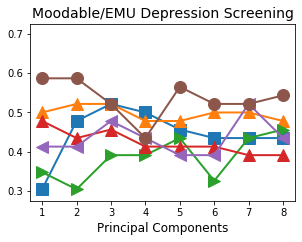

In [21]:
name = "latencyMoodE"
label = "phq" #gad
split = 10
low = 7
resultsDF = pd.read_csv("results2/" + name + label + str(split) + "low" + str(low) + ".csv")

modellist = sorted(list(set(resultsDF.model)))
featurelist = sorted(list(set(resultsDF.nFeatures)))
balancedAcc = []

for model in modellist:
    values = []
    for features in featurelist:
        tempdf = resultsDF[(resultsDF.model == model) & (resultsDF.nFeatures == features)]
        
        sen = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falseNeg))
        spec = sum(tempdf.trueNeg)/(sum(tempdf.trueNeg) + sum(tempdf.falsePos))
        ba = (sen+spec)/2
        
        values.append(ba)
    balancedAcc.append(values)
    
modellist = ["LR", "NB", "RF", "SVC", "XGBoost", "kNN"]

markers = ['s', '^', '>', '^', '<', 'o']
plt.figure(figsize = (4.75, 3.25))
for i in range(0, len(balancedAcc)):
    plt.plot(featurelist, balancedAcc[i], marker = markers[i], label = modellist[i], linewidth=2, markersize=12)
    
plt.ylim(0.275, 0.725)
plt.xlabel("Principal Components", fontsize = 12)
#plt.ylabel("Balanced Accuracy", fontsize = 12)
plt.title("Moodable/EMU Depression Screening", fontsize = 14)
#plt.legend(ncol=3,loc=1)

plt.savefig("depressionMoodE2.png", bbox_inches = "tight")

plt.show()
plt.close()

In [90]:
name = "latencyBoth"
label = "phq" #gad
split = 10
low = 7
resultsDF = pd.read_csv("results2/" + name + label + str(split) + "low" + str(low) + ".csv")

prev = 0

for model in sorted(set(resultsDF.model)):
    for features in sorted(set(resultsDF.nFeatures)):
        tempdf = resultsDF[(resultsDF.model == model) & (resultsDF.nFeatures == features)]
        
        sen = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falseNeg))
        spec = sum(tempdf.trueNeg)/(sum(tempdf.trueNeg) + sum(tempdf.falsePos))
        prec = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falsePos))
        ba = (sen+spec)/2
        f1 = (2*prec*sen)/(prec + sen)
        acc = (sum(tempdf.truePos) + sum(tempdf.trueNeg))/tempdf.shape[0]
        if ba>=(prev-0.01):
            prev = ba
            print(model)
            print(features)
            print("TP = " + str(sum(tempdf.truePos)))
            print("FP = " + str(sum(tempdf.falsePos)))
            print("FN = " + str(sum(tempdf.falseNeg)))
            print("TN = " + str(sum(tempdf.trueNeg)))
            print("Bal Acc = " + str(ba))
            print("F1 = " + str(f1))
            print("Acc = " + str(acc))
            print("Sens = " + str(sen))
            print("Spec = " + str(spec))

LR1
1
TP = 23
FP = 19
FN = 28
TN = 25
Bal Acc = 0.5095811051693405
F1 = 0.49462365591397855
Acc = 0.5052631578947369
Sens = 0.45098039215686275
Spec = 0.5681818181818182
LR1
2
TP = 33
FP = 25
FN = 18
TN = 19
Bal Acc = 0.5394385026737968
F1 = 0.6055045871559633
Acc = 0.5473684210526316
Sens = 0.6470588235294118
Spec = 0.4318181818181818
LR1
3
TP = 37
FP = 23
FN = 14
TN = 21
Bal Acc = 0.6013814616755793
F1 = 0.6666666666666666
Acc = 0.6105263157894737
Sens = 0.7254901960784313
Spec = 0.4772727272727273
LR1
4
TP = 36
FP = 23
FN = 15
TN = 21
Bal Acc = 0.5915775401069518
F1 = 0.6545454545454547
Acc = 0.6
Sens = 0.7058823529411765
Spec = 0.4772727272727273
LR1
5
TP = 35
FP = 20
FN = 16
TN = 24
Bal Acc = 0.6158645276292335
F1 = 0.660377358490566
Acc = 0.6210526315789474
Sens = 0.6862745098039216
Spec = 0.5454545454545454
LR1
6
TP = 36
FP = 20
FN = 15
TN = 24
Bal Acc = 0.625668449197861
F1 = 0.6728971962616823
Acc = 0.631578947368421
Sens = 0.7058823529411765
Spec = 0.5454545454545454
RF
5
TP 

In [92]:
name = "latencyBoth"
label = "phq" #gad
split = 10
low = 7
resultsDF = pd.read_csv("results2/" + name + label + str(split) + "low" + str(low) + ".csv")

prev = 0

for model in sorted(set(resultsDF.model)):
    for features in sorted(set(resultsDF.nFeatures)):
        tempdf = resultsDF[(resultsDF.model == model) & (resultsDF.nFeatures == features)]
        
        sen = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falseNeg))
        spec = sum(tempdf.trueNeg)/(sum(tempdf.trueNeg) + sum(tempdf.falsePos))
        prec = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falsePos))
        ba = (sen+spec)/2
        f1 = (2*prec*sen)/(prec + sen)
        acc = (sum(tempdf.truePos) + sum(tempdf.trueNeg))/tempdf.shape[0]
        #if ba>=(prev-0.01):
        if model == 'kNN5':
            print(model)
            print(features)
            print("TP = " + str(sum(tempdf.truePos)))
            print("FP = " + str(sum(tempdf.falsePos)))
            print("FN = " + str(sum(tempdf.falseNeg)))
            print("TN = " + str(sum(tempdf.trueNeg)))
            print("Bal Acc = " + str(ba))
            print("F1 = " + str(f1))
            print("Acc = " + str(acc))
            print("Sens = " + str(sen))
            print("Spec = " + str(spec))

kNN5
1
TP = 26
FP = 26
FN = 25
TN = 18
Bal Acc = 0.4594474153297683
F1 = 0.5048543689320388
Acc = 0.4631578947368421
Sens = 0.5098039215686274
Spec = 0.4090909090909091
kNN5
2
TP = 24
FP = 31
FN = 27
TN = 13
Bal Acc = 0.3830213903743316
F1 = 0.45283018867924524
Acc = 0.3894736842105263
Sens = 0.47058823529411764
Spec = 0.29545454545454547
kNN5
3
TP = 27
FP = 26
FN = 24
TN = 18
Bal Acc = 0.4692513368983957
F1 = 0.5192307692307693
Acc = 0.47368421052631576
Sens = 0.5294117647058824
Spec = 0.4090909090909091
kNN5
4
TP = 30
FP = 26
FN = 21
TN = 18
Bal Acc = 0.49866310160427807
F1 = 0.5607476635514018
Acc = 0.5052631578947369
Sens = 0.5882352941176471
Spec = 0.4090909090909091
kNN5
5
TP = 33
FP = 26
FN = 18
TN = 18
Bal Acc = 0.5280748663101604
F1 = 0.6
Acc = 0.5368421052631579
Sens = 0.6470588235294118
Spec = 0.4090909090909091
kNN5
6
TP = 32
FP = 26
FN = 19
TN = 18
Bal Acc = 0.518270944741533
F1 = 0.5871559633027523
Acc = 0.5263157894736842
Sens = 0.6274509803921569
Spec = 0.40909090909090

In [93]:
name = "latencyMoodE"
label = "phq" #gad
split = 10
low = 7
resultsDF = pd.read_csv("results2/" + name + label + str(split) + "low" + str(low) + ".csv")

prev = 0

for model in set(resultsDF.model):
    for features in set(resultsDF.nFeatures):
        tempdf = resultsDF[(resultsDF.model == model) & (resultsDF.nFeatures == features)]
        
        sen = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falseNeg))
        spec = sum(tempdf.trueNeg)/(sum(tempdf.trueNeg) + sum(tempdf.falsePos))
        prec = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falsePos))
        ba = (sen+spec)/2
        f1 = (2*prec*sen)/(prec + sen)
        acc = (sum(tempdf.truePos) + sum(tempdf.trueNeg))/tempdf.shape[0]
        if model == 'LR1':
            print(model)
            print(features)
            print("TP = " + str(sum(tempdf.truePos)))
            print("FP = " + str(sum(tempdf.falsePos)))
            print("FN = " + str(sum(tempdf.falseNeg)))
            print("TN = " + str(sum(tempdf.trueNeg)))
            print("Bal Acc = " + str(ba))
            print("F1 = " + str(f1))
            print("Acc = " + str(acc))
            print("Sens = " + str(sen))
            print("Spec = " + str(spec))

LR1
1
TP = 8
FP = 17
FN = 15
TN = 6
Bal Acc = 0.30434782608695654
F1 = 0.3333333333333333
Acc = 0.30434782608695654
Sens = 0.34782608695652173
Spec = 0.2608695652173913
LR1
2
TP = 10
FP = 11
FN = 13
TN = 12
Bal Acc = 0.4782608695652174
F1 = 0.4545454545454545
Acc = 0.4782608695652174
Sens = 0.43478260869565216
Spec = 0.5217391304347826
LR1
3
TP = 12
FP = 11
FN = 11
TN = 12
Bal Acc = 0.5217391304347826
F1 = 0.5217391304347826
Acc = 0.5217391304347826
Sens = 0.5217391304347826
Spec = 0.5217391304347826
LR1
4
TP = 11
FP = 11
FN = 12
TN = 12
Bal Acc = 0.5
F1 = 0.4888888888888889
Acc = 0.5
Sens = 0.4782608695652174
Spec = 0.5217391304347826
LR1
5
TP = 9
FP = 11
FN = 14
TN = 12
Bal Acc = 0.4565217391304348
F1 = 0.4186046511627907
Acc = 0.45652173913043476
Sens = 0.391304347826087
Spec = 0.5217391304347826
LR1
6
TP = 9
FP = 12
FN = 14
TN = 11
Bal Acc = 0.4347826086956522
F1 = 0.4090909090909091
Acc = 0.43478260869565216
Sens = 0.391304347826087
Spec = 0.4782608695652174
LR1
7
TP = 9
FP = 12
F

In [94]:
name = "latencyMoodE"
label = "phq" #gad
split = 10
low = 7
resultsDF = pd.read_csv("results2/" + name + label + str(split) + "low" + str(low) + ".csv")

prev = 0

for model in set(resultsDF.model):
    for features in set(resultsDF.nFeatures):
        tempdf = resultsDF[(resultsDF.model == model) & (resultsDF.nFeatures == features)]
        
        sen = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falseNeg))
        spec = sum(tempdf.trueNeg)/(sum(tempdf.trueNeg) + sum(tempdf.falsePos))
        prec = sum(tempdf.truePos)/(sum(tempdf.truePos) + sum(tempdf.falsePos))
        ba = (sen+spec)/2
        f1 = (2*prec*sen)/(prec + sen)
        acc = (sum(tempdf.truePos) + sum(tempdf.trueNeg))/tempdf.shape[0]
        if ba>prev:
            prev = ba
            print(model)
            print(features)
            print("TP = " + str(sum(tempdf.truePos)))
            print("FP = " + str(sum(tempdf.falsePos)))
            print("FN = " + str(sum(tempdf.falseNeg)))
            print("TN = " + str(sum(tempdf.trueNeg)))
            print("Bal Acc = " + str(ba))
            print("F1 = " + str(f1))
            print("Acc = " + str(acc))
            print("Sens = " + str(sen))
            print("Spec = " + str(spec))

NB
1
TP = 15
FP = 15
FN = 8
TN = 8
Bal Acc = 0.5
F1 = 0.5660377358490566
Acc = 0.5
Sens = 0.6521739130434783
Spec = 0.34782608695652173
NB
2
TP = 13
FP = 12
FN = 10
TN = 11
Bal Acc = 0.5217391304347826
F1 = 0.5416666666666667
Acc = 0.5217391304347826
Sens = 0.5652173913043478
Spec = 0.4782608695652174
kNN5
1
TP = 13
FP = 9
FN = 10
TN = 14
Bal Acc = 0.5869565217391304
F1 = 0.5777777777777778
Acc = 0.5869565217391305
Sens = 0.5652173913043478
Spec = 0.6086956521739131
